### Data Science Game 2017

Data fields

    media_id - identifiant of the song listened by the user
    album_id - identifiant of the album of the song
    media_duration - duration of the song
    user_gender -  gender of the user
    user_id -  anonymized id of the user
    context_type - type of content where the song was listened: playlist, album ...
    release_date - release date of the song with the format YYYYMMDD
    ts_listen - timestamp of the listening in UNIX time
    platform_name - type of os
    platform_family - type of device
    user_age - age of the user
    listen_type - if the songs was listened in a flow or not
    artist_id - identifiant of the artist of the song
    genre_id - identifiant of the genre of the song
    is_listened - 1 if the track was listened, 0 otherwise


In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("../data/train_data3.csv")
df_test = pd.read_csv("../data/test_data3.csv")

In [3]:
df_train.columns

Index([u'Unnamed: 0', u'genre_id', u'ts_listen', u'media_id', u'album_id',
       u'context_type', u'release_date', u'platform_name', u'platform_family',
       u'media_duration', u'listen_type', u'user_gender', u'user_id',
       u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

In [4]:
to_drop = ['Unnamed: 0']
df_train.drop(to_drop, axis = 1,inplace=True)
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,diff_ts_listen_AND_release_date_M,diff_ts_listen_AND_release_date_Y,release_date_DAY,release_date_MONTH,release_date_YEAR,ts_listen_DAY_OF_WEEK,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,151.100000,12.419178,4,7,2004,3,0,2,16.580822,7
1,25571,2016-11-30 20:25:35,250467,43941,0,2006-03-01 00:00:00,2,1,3.0,0,...,130.900000,10.758904,1,3,2006,2,2,2,19.241096,7
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14 00:00:00,2,1,2.0,1,...,28.633333,2.353425,14,7,2014,5,0,2,26.646575,8
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30 00:00:00,0,0,4.0,0,...,195.700000,16.084932,30,10,2000,5,0,2,13.915068,6
4,7,2016-11-05 16:02:54,542335,71718,0,2008-02-15 00:00:00,0,0,3.0,0,...,106.200000,8.728767,15,2,2008,5,1,1,15.271233,7


In [5]:
pd.isnull(df_train).sum()[pd.isnull(df_train).sum() > 0]

Series([], dtype: int64)

In [6]:
df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

,media_id,ts_listen
1924693,71089141,2016-11-13 00:49:01
1924694,71089141,2016-11-26 13:22:19
1924695,71089141,2016-11-05 06:37:20
1924696,71089141,2016-11-03 08:09:15
1924697,71089141,2016-11-01 17:12:53
1924698,71089141,2016-11-01 12:09:04
1947315,70834665,2016-11-05 19:12:28
1947316,70834665,2016-11-11 14:10:36
1947317,70834665,2016-11-06 18:41:02
1947318,70834665,2016-11-17 10:59:55


In [7]:
df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

,media_id,ts_listen
1924693,71089141,2016-11-13 00:49:01
1924694,71089141,2016-11-26 13:22:19
1924695,71089141,2016-11-05 06:37:20
1924696,71089141,2016-11-03 08:09:15
1924697,71089141,2016-11-01 17:12:53
1924698,71089141,2016-11-01 12:09:04
1947315,70834665,2016-11-05 19:12:28
1947316,70834665,2016-11-11 14:10:36
1947317,70834665,2016-11-06 18:41:02
1947318,70834665,2016-11-17 10:59:55


### Append User Specific

In [8]:
df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]
#df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)
df_user.columns.values

array(['user_id', 'nmidia_regular_listened', 'nmidia_with_flow_listened',
       'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff'], dtype=object)

In [9]:
pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]

nmidia_with_flow_listened_PROP    3947
nmidia_regular_listened_PROP       429
nmidia_PROP_diff                  4400
dtype: int64

In [10]:
df_train = pd.merge(df_train, df_user, on="user_id")
df_test = pd.merge(df_test, df_user, on="user_id")
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,user_age_group,diff_user_song_age,media_decade,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow,nmidia_with_flow_listened_PROP,nmidia_regular_listened_PROP,nmidia_PROP_diff
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,2,16.580822,7,41,48,57,71,0.676056,0.719298,0.939883
1,7,2016-12-01 10:48:50,4301418,400118,9,2009-10-16 00:00:00,1,0,7.0,0,...,2,21.868493,7,41,48,57,71,0.676056,0.719298,0.939883
2,10,2016-11-30 11:48:22,983248,109347,0,2002-10-21 00:00:00,1,0,3.0,0,...,2,14.879452,7,41,48,57,71,0.676056,0.719298,0.939883
3,10,2016-12-01 07:18:24,983248,109347,0,2002-10-21 00:00:00,1,0,3.0,0,...,2,14.876712,7,41,48,57,71,0.676056,0.719298,0.939883
4,10,2016-11-29 09:42:52,983248,109347,1,2002-10-21 00:00:00,1,0,3.0,1,...,2,14.882192,7,41,48,57,71,0.676056,0.719298,0.939883


### Check for NA
#### Ver depois sobre o user_age_group!

In [11]:
pd.isnull(df_train).sum()[pd.isnull(df_train).sum() > 0]

nmidia_with_flow_listened_PROP    437883
nmidia_regular_listened_PROP       31133
nmidia_PROP_diff                  469415
dtype: int64

In [12]:
df_train.dropna(inplace=True)

In [13]:
y = df_train["is_listened"].values

In [14]:
categorical_cols = ["genre_id",
                   "media_id",
                   "album_id",
                   "context_type",
                   "release_date",
                   "platform_name",
                   "platform_family",
                   "listen_type",
                   "user_gender",
                   "user_id",
                   "artist_id",
                   "user_age"]

### Let's inspect the categorical variables!

In [15]:
for col in categorical_cols:
    print("{}: {}".format(col, len(df_train[col].unique())))

genre_id: 2882
media_id: 435606
album_id: 146612
context_type: 74
release_date: 8828
platform_name: 3
platform_family: 3
listen_type: 2
user_gender: 2
user_id: 15518
artist_id: 64992
user_age: 13


### Strategy
1. Apply onehot to categorical with few classes
2. Rank categories to artist id
3. target encoder for context and genre
4. discard media, album, release date and user_id

In [16]:
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount

In [17]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'platform_name', 'platform_family',
       'media_duration', 'listen_type', 'user_gender', 'user_id',
       'artist_id', 'user_age', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'ts_listen_DAY_OF_WEEK',
       'ts_listen_PERIOD_OF_DAY', 'user_age_group', 'diff_user_song_age',
       'media_decade', 'nmidia_regular_listened',
       'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff'], dtype=object)

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'genre_id', u'ts_listen', u'media_id',
       u'album_id', u'context_type', u'release_date', u'platform_name',
       u'platform_family', u'media_duration', u'listen_type', u'user_gender',
       u'user_id', u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

In [18]:
cols_for_target_encoder = ["genre_id", 
                           "context_type", 
                           "user_id", 
                           "media_id", 
                           "listen_type"]

cols_for_onehot = ["platform_name", 
                   "platform_family", 
                   "listen_type", 
                   "user_gender", 
                   "user_age_group", 
                   "ts_listen_DAY_OF_WEEK",
                  "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id"]
                #"media_decade"]


target = "is_listened"

In [19]:
te = TargetEncoder(cols_for_target_encoder, "is_listened")

In [20]:
te.fit(df_train)

In [21]:
te.transform(df_train)
te.transform(df_test)

In [22]:
rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)

In [23]:
rc = RankCategorical(["media_decade"])
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)

In [24]:
# lc = RankCategorical(cols_for_count)
# lc.fit(df_train)
# lc.transform(df_train)
# lc.transform(df_test)

In [25]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,user_age_group,diff_user_song_age,media_decade,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow,nmidia_with_flow_listened_PROP,nmidia_regular_listened_PROP,nmidia_PROP_diff
0,0.686623,2016-12-01 11:00:15,0.000000,41774,0.699649,2004-07-04 00:00:00,1,0,4.0,0.722937,...,2,16.580822,2,41,48,57,71,0.676056,0.719298,0.939883
1,0.662254,2016-12-01 10:48:50,0.736515,400118,0.758486,2009-10-16 00:00:00,1,0,7.0,0.722937,...,2,21.868493,2,41,48,57,71,0.676056,0.719298,0.939883
2,0.726022,2016-11-30 11:48:22,0.631272,109347,0.689215,2002-10-21 00:00:00,1,0,3.0,0.722937,...,2,14.879452,2,41,48,57,71,0.676056,0.719298,0.939883
3,0.726022,2016-12-01 07:18:24,0.631272,109347,0.689215,2002-10-21 00:00:00,1,0,3.0,0.722937,...,2,14.876712,2,41,48,57,71,0.676056,0.719298,0.939883
4,0.726022,2016-11-29 09:42:52,0.631272,109347,0.572574,2002-10-21 00:00:00,1,0,3.0,0.600162,...,2,14.882192,2,41,48,57,71,0.676056,0.719298,0.939883


In [26]:
df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

In [27]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,media_duration,user_id,artist_id,user_age,...,user_age_group_2,ts_listen_DAY_OF_WEEK_1,ts_listen_DAY_OF_WEEK_2,ts_listen_DAY_OF_WEEK_3,ts_listen_DAY_OF_WEEK_4,ts_listen_DAY_OF_WEEK_5,ts_listen_DAY_OF_WEEK_6,ts_listen_PERIOD_OF_DAY_1,ts_listen_PERIOD_OF_DAY_2,ts_listen_PERIOD_OF_DAY_3
0,0.686623,2016-12-01 11:00:15,0.000000,41774,0.699649,2004-07-04 00:00:00,4.0,0.676991,54726,29,...,1,0,0,1,0,0,0,0,0,0
1,0.662254,2016-12-01 10:48:50,0.736515,400118,0.758486,2009-10-16 00:00:00,7.0,0.676991,586,29,...,1,0,0,1,0,0,0,0,0,0
2,0.726022,2016-11-30 11:48:22,0.631272,109347,0.689215,2002-10-21 00:00:00,3.0,0.676991,63,29,...,1,0,1,0,0,0,0,0,0,0
3,0.726022,2016-12-01 07:18:24,0.631272,109347,0.689215,2002-10-21 00:00:00,3.0,0.676991,63,29,...,1,0,0,1,0,0,0,0,0,0
4,0.726022,2016-11-29 09:42:52,0.631272,109347,0.572574,2002-10-21 00:00:00,3.0,0.676991,63,29,...,1,1,0,0,0,0,0,0,0,0


In [28]:
#df_train = rank_categorical(df_train, cols_for_rank)

In [29]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'media_duration', 'user_id', 'artist_id',
       'user_age', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'diff_user_song_age',
       'media_decade', 'nmidia_regular_listened',
       'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff', 'platform_name_1', 'platform_name_2',
       'platform_family_1', 'platform_family_2',
       'listen_type_0.722936520467', 'user_gender_1', 'user_age_group_1',
       'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1',
       'ts_listen_DAY_OF_WEEK_2', 'ts_listen_DAY_OF_WEEK_3',
       'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5',
       'ts_listen_DAY_OF_WEE

In [30]:
### Drop
to_drop = ['ts_listen', 'album_id', 'release_date', 'artist_id', "year", "text"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

In [31]:
# to_drop = ["year", "text"]
# df_train.drop(to_drop, axis = 1,inplace=True)

In [32]:
features = [col for col in df_train.columns.values if col != target]
do_not_consider = [ 'nmidia_with_flow_listened_PROP',
                    'nmidia_regular_listened_PROP',
                    'nmidia_PROP_diff',
                    'release_date_DAY',
                    'release_date_MONTH']
features = [feat for feat in features if feat not in do_not_consider]
features

['genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'user_id',
 'user_age',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_YEAR',
 'diff_user_song_age',
 'media_decade',
 'nmidia_regular_listened',
 'nmidia_with_flow_listened',
 'nmidia_regular',
 'nmidia_with_flow',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'listen_type_0.722936520467',
 'user_gender_1',
 'user_age_group_1',
 'user_age_group_2',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

### Feature Selection

In [35]:
from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.01

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

32 selected variables from 33, 96.97%
['genre_id', 'media_id', 'context_type', 'media_duration', 'user_id', 'user_age', 'diff_ts_listen_AND_release_date_D', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_YEAR', 'diff_user_song_age', 'media_decade', 'nmidia_regular_listened', 'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'listen_type_0.722936520467', 'user_gender_1', 'user_age_group_1', 'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_3', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_DAY_OF_WEEK_6', 'ts_listen_PERIOD_OF_DAY_1', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']


In [36]:
feaures = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.5)

In [37]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def complete_report(y_test, y_pred):
    print("*********************************")
    print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {0}".format(metrics.recall_score(y_test, y_pred)))
    print("F1-Score: {0}".format(metrics.f1_score(y_test, y_pred)))
    conf_m = confusion_matrix(y_test, y_pred)
    print(conf_m)
    try: 
        print("Roc Area: {0}".format(metrics.roc_auc_score(y_test, y_pred))) 
        roc_curve_label(y_test, y_pred)
    except:
        print("--")
    print("*********************************")
    
    return metrics.roc_auc_score(y_test, y_pred)
        
def roc_curve_label(y_test, y_pred):
    plt.figsize=(10,6)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='RT + LR')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

0.934821865088
*********************************
Accuracy: 0.93
Precision: 0.959468695412
Recall: 0.944534268735
F1-Score: 0.951942911498
[[1025406   96664]
 [ 134373 2288258]]
Roc Area: 0.92919317285


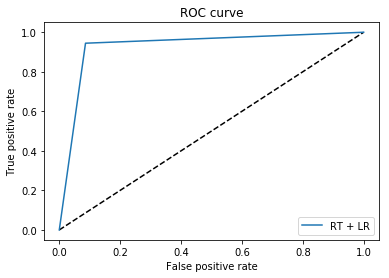

*********************************


0.92919317285000091

In [39]:
print(model.score(X_test, y_test))
complete_report(y_test, model.predict(X_test))

acc: 0.70345496362865445  
roc: 0.6912675674785278

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test, model.predict(X_test))

array([[1025406,   96664],
       [ 134373, 2288258]])

In [42]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [43]:
# complete_report(y_test, model.predict(X_test))

Accuracy: 0.78
Precision: 0.84001691734
Recall: 0.846298509908
F1-Score: 0.843146014032
[[283851 155469]
 [148256 816315]]
Roc Area: 0.746206479756

In [44]:
# roc_curve_label(y_test, model.predict(X_test))

In [45]:
import xgboost as xgb
from time import time
import numpy as np

start = time()
xg_train = xgb.DMatrix(X_train, label=y_train.values, missing=np.NaN)
xg_test = xgb.DMatrix(X_test, label=y_test.values, missing=np.NaN)
xg_val = xgb.DMatrix(X_val, label=y_val.values, missing=np.NaN)
param = {'max_depth':10, 
         'eta':0.2, 
         'silent':0, 
         'objective':'binary:logistic', 
         "booster": "gbtree", 
         "max_delta_step":1,
         "alpha": 1,
         "lambda": 0,
         #"scale_pos_weight": class_ratio,
         "eval_metric": "auc",
          "verbose": 1}

### Objectives
## 'binary:logistic'
## 'multi:softprob'
#param['num_class'] = 2
param["min_child_weight"] = 10
param["colsample_bytree"] = 1
num_round = 300

watchlist = [(xg_train,'train'), (xg_val,'validation')]
#watchlist = [(xg_val,'validation')]

bst = xgb.train(param, 
                xg_train, 
                num_round,
                watchlist,
                early_stopping_rounds=5)

yprob = bst.predict( xg_test ) #.reshape( y_test.shape[0], 2)
print(yprob[0])

print('Tempo de execução: {0}m{1}s'.format(int((time()-start)/60),
             int((time()-start)%60 )))

/home/lgmoneda/miniconda2/envs/ml/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0]	train-auc:0.789532	validation-auc:0.789397
Multiple eval metrics have been passed: 'validation-auc' will be used for early stopping.

Will train until validation-auc hasn't improved in 5 rounds.
[1]	train-auc:0.805698	validation-auc:0.805455
[2]	train-auc:0.815334	validation-auc:0.815055
[3]	train-auc:0.821402	validation-auc:0.821133
[4]	train-auc:0.825324	validation-auc:0.825082
[5]	train-auc:0.827222	validation-auc:0.826995
[6]	train-auc:0.828622	validation-auc:0.828391
[7]	train-auc:0.829502	validation-auc:0.829263
[8]	train-auc:0.829943	validation-auc:0.829699
[9]	train-auc:0.830336	validation-auc:0.830086
[10]	train-auc:0.83063	validation-auc:0.830374
[11]	train-auc:0.830808	validation-auc:0.830551
[12]	train-auc:0.830983	validation-auc:0.830722
[13]	train-auc:0.831163	validation-auc:0.8309
[14]	train-auc:0.831295	validation-auc:0.831027
[15]	train-auc:0.831576	validation-auc:0.831314
[16]	train-auc:0.831741	validation-auc:0.831476
[17]	train-auc:0.83188	validation-auc:0.83160

[[ 647199  474871]
 [ 225124 2197507]]
*********************************
Accuracy: 0.80
Precision: 0.822303955503
Recall: 0.907074581313
F1-Score: 0.862611626398
[[ 647199  474871]
 [ 225124 2197507]]
Roc Area: 0.741932399696


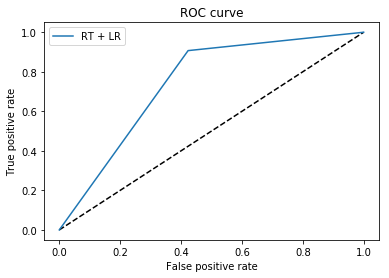

*********************************


0.74193239969585834

In [46]:
y_pred = [1 if y > 0.5 else 0 for y in yprob]
print(metrics.confusion_matrix(y_test, y_pred))

complete_report(y_test, y_pred)

In [47]:
### Verificando a importância de cada feature para a previsão do modelo
import operator
importance = bst.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
for item in importance:
    print(item)

('user_id', 15033)
('nmidia_with_flow_listened', 13261)
('nmidia_with_flow', 12887)
('nmidia_regular_listened', 12158)
('nmidia_regular', 12051)
('diff_ts_listen_AND_release_date_D', 9971)
('media_id', 9912)
('diff_user_song_age', 9228)
('context_type', 8979)
('user_age', 6812)
('genre_id', 5799)
('media_duration', 3241)
('ts_listen_PERIOD_OF_DAY_1', 2844)
('ts_listen_PERIOD_OF_DAY_2', 2233)
('user_gender_1', 2112)
('release_date_YEAR', 2060)
('ts_listen_DAY_OF_WEEK_5', 1578)
('ts_listen_DAY_OF_WEEK_1', 1530)
('ts_listen_DAY_OF_WEEK_4', 1511)
('ts_listen_DAY_OF_WEEK_2', 1488)
('ts_listen_PERIOD_OF_DAY_3', 1452)
('ts_listen_DAY_OF_WEEK_3', 1438)
('ts_listen_DAY_OF_WEEK_6', 1384)
('platform_name_1', 1326)
('listen_type_0.722936520467', 1312)
('platform_name_2', 1041)
('user_age_group_1', 966)
('platform_family_2', 823)
('media_decade', 232)


In [48]:
xg_sub = xgb.DMatrix(df_test[features], missing=np.NaN)
p = bst.predict(xg_sub)
#p = [1 if y > 0.5 else 0 for y in yprob]

In [49]:
import gzip
import csv
import numpy as np

def build_kaggle_submission(preds, filename="my_submission"):
    """
    Build a compressed Kaggle Submission
    
    preds: array with predictions
    """
    with gzip.open(filename + '.csv.gz', 'wt') as outf:
        fo = csv.writer(outf, lineterminator='\n')
        fo.writerow(["sample_id", "is_listened"])       
        for i, pred in enumerate(preds):
            fo.writerow([i, pred])

In [50]:
# p = model.predict_proba(df_test[features])

In [51]:
# p = p[:, 1]
p

array([ 0.99934846,  0.50063807,  0.85159296, ...,  0.80031896,
        0.79342592,  0.89867008], dtype=float32)

In [52]:
build_kaggle_submission(p, "_xgb")

In [53]:
import sys
print(sys.getsizeof(df_train) / 1e6)
print(sys.getsizeof(df_test) / 1e6)
print(sys.getsizeof(model) / 1e6)

1424.969834
4.162894
6.4e-05


### GridSearch and XGBoost

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Reshape
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
import numpy as np

In [ ]:
model = Sequential()
model.add(Embedding(df_train["album_id"].max(), 64, input_length=10))
model.add(Dense(1, activation="relu"))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

input_array = np.random.randint(1000, size=(32, 10))
print(input_array)
model.compile('rmsprop', 'mse')
model.fit(input_array, np.array([1]))

output_array = model.predict(input_array)
#assert output_array.shape == (32, 10, 64)
print(output_array)

In [ ]:
df_train["album_id"].max()

In [ ]:
output_array